In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
part_d_df = pd.read_csv('data/part_d_2013.csv', low_memory=False)
exclusion_df = pd.read_csv('data/exclusion_list_2014.csv', low_memory=False)
print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (23645873, 21)


In [3]:
# reorganize data columns
part_d_df = part_d_df[['npi', 'nppes_provider_city','nppes_provider_state', 'specialty_description', 'description_flag',\
                        'drug_name', 'generic_name', 'bene_count', 'total_claim_count','total_day_supply', \
                        'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65', 'total_day_supply_ge65',\
                        'total_drug_cost_ge65']]

# assigning exclusion (False = 0, True = 1)
exclusion_npi = exclusion_df['NPI'].values.tolist()

part_d_df['is_excluded'] = 0
part_d_df.loc[part_d_df['npi'].isin(exclusion_npi), 'is_excluded'] = 1

# get US data to analyze
states = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', \
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', \
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', \
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', \
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',' WY']

part_d_df = part_d_df[part_d_df['nppes_provider_state'].isin(states)]

print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (23233763, 16)


In [4]:
part_d_df.loc[part_d_df['is_excluded']==1].head(2)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
24496,1003801044,KENNER,LA,Internal Medicine,S,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,NaN,11,104,71.18,NaN,NaN,NaN,NaN,1
24497,1003801044,KENNER,LA,Internal Medicine,S,DILTIAZEM 24HR CD,DILTIAZEM HCL,NaN,25,990,840.47,NaN,25.0,990.0,840.47,1


In [5]:
# Top 10 states which has the most excluded prescribers
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
part_d_df_exclusion_state_count = part_d_df_exclusion.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:10]
part_d_df_exclusion_state_count.reset_index(level=["nppes_provider_state"], inplace=True)
part_d_df_exclusion_state_count

,nppes_provider_state,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,CA,957,957,957,957,957,957,269,957,957,957,114,526,526,526,957
1,NJ,756,756,756,756,756,756,251,756,756,756,55,428,428,428,756
2,TN,567,567,567,567,567,567,181,567,567,567,103,349,349,349,567
3,PA,544,544,544,544,544,544,209,544,544,544,73,349,349,349,544
4,MO,439,439,439,439,439,439,167,439,439,439,61,261,261,261,439
5,MI,381,381,381,381,381,381,123,381,381,381,93,187,187,187,381
6,NY,344,344,344,344,344,344,122,344,344,344,71,189,189,189,344
7,TX,300,300,300,300,300,300,72,300,300,300,35,159,159,159,300
8,IL,242,242,242,242,242,242,81,242,242,242,27,144,144,144,242
9,VA,214,214,214,214,214,214,69,214,214,214,55,119,119,119,214


In [6]:
# Top 10 specialties which has the most excluded prescribers
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
part_d_df_exclusion_specialty_count = part_d_df_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:10]
part_d_df_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,2378,2378,2378,2378,2378,2378,801,2378,2378,2378,305,1442,1442,1442,2378
1,Family Practice,1414,1414,1414,1414,1414,1414,367,1414,1414,1414,176,761,761,761,1414
2,Psychiatry,379,379,379,379,379,379,172,379,379,379,115,225,225,225,379
3,Emergency Medicine,302,302,302,302,302,302,139,302,302,302,59,165,165,165,302
4,Cardiology,222,222,222,222,222,222,66,222,222,222,7,137,137,137,222
5,Physician Assistant,186,186,186,186,186,186,68,186,186,186,27,81,81,81,186
6,Geriatric Medicine,167,167,167,167,167,167,39,167,167,167,23,87,87,87,167
7,General Practice,158,158,158,158,158,158,50,158,158,158,32,93,93,93,158
8,General Surgery,128,128,128,128,128,128,25,128,128,128,24,85,85,85,128
9,Anesthesiology,81,81,81,81,81,81,42,81,81,81,31,47,47,47,81


In [7]:
# top selling drugs
top_drug_price = part_d_df.groupby('drug_name').sum().sort_values('total_drug_cost', ascending=False).iloc[0:10]
top_drug_count = part_d_df.groupby('drug_name').count().sort_values('total_drug_cost', ascending=False).iloc[0:10]
top_drug_price.head(10)

,npi,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
drug_name,,,,,,,,,,
NEXIUM,215921188492074,1058265.0,7595684,302631190,2.312639e+09,205727.0,4010103.0,160555864.0,1.208570e+09,39
CRESTOR,214742035896990,1392574.0,8522177,385021662,2.072684e+09,311274.0,4888913.0,220432155.0,1.183839e+09,38
ADVAIR DISKUS,199637789950772,1055585.0,5970114,223177886,2.044693e+09,208365.0,2989717.0,112942551.0,1.026943e+09,33
ABILIFY,74923167262754,277964.0,2577616,72931503,1.852547e+09,17015.0,652592.0,16019756.0,3.843950e+08,27
SPIRIVA,169675257806065,767053.0,5187112,196389729,1.763187e+09,179863.0,2886946.0,110497146.0,9.896536e+08,30
CYMBALTA,198008419211098,619449.0,6272885,204806941,1.754838e+09,76791.0,2694310.0,84288433.0,6.922628e+08,41
NAMENDA,136651632895402,565048.0,6425812,169490534,1.424079e+09,278114.0,5241929.0,136782740.0,1.148710e+09,25
JANUVIA,136424986182555,406523.0,3942598,154038360,1.296743e+09,79716.0,2269790.0,88358223.0,7.425674e+08,23
LANTUS SOLOSTAR,134455414893294,484103.0,3381602,143697499,1.205171e+09,94437.0,1560237.0,68202813.0,5.422744e+08,18


In [8]:
# plotting use top ten drugs by price and amount
trace_price = go.Bar(x=top_drug_price.index, y=top_drug_price['total_drug_cost'], name='by price', 
                     marker=dict(color='rgb(241,250,248)', line=dict(color='rgb(000,000,102)', width=1.5)),
                     opacity = 0.8)
                     
trace_count = go.Bar(x=top_drug_count.index, y=top_drug_count['total_drug_cost'], name='by amount', 
                     marker=dict(color='rgb(241,250,248)', line=dict(color='rgb(13,129,106)', width=1.5)),
                     opacity = 0.8)
data = [trace_price, trace_count]

updatemenus = list([
    dict(
        buttons=list([
            dict(label = 'by price',
                method = 'update',
                args = [{'visible': [True, False]},
                         {'title': 'Top 10 Drugs in Medicare (By Price)'}]),
            dict(label = 'by amount',
                method = 'update',
                args = [{'visible': [False, True]},
                        {'title': 'Top 10 Drugs in Medicare (By Amount)'}])
        ]),
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = .8,
        xanchor = 'left',
        y = 1.1,
        yanchor = 'top' )
    
])
layout = dict(title='Top 10 Drugs in Medicare (By Price)', showlegend=False, 
              margin=go.Margin(l=50, r=100, b=120, t=10, pad=4),
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='drug_dropdown')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:396: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~acopolu/0 or inside your plot.ly account where it is named 'drug_dropdown'


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [9]:
# Top 10 drugs sold by excluded providers
excluded_providers = part_d_df.loc[part_d_df['is_excluded'] == 1]
excluded_drug_rank = excluded_providers.groupby('drug_name').sum().sort_values('total_drug_cost', ascending=False).iloc[0:10]

# Plotting
trace_ex_price = go.Bar(x=excluded_drug_rank.index, y=excluded_drug_rank['total_drug_cost'], name='by price', 
                     marker=dict(color='rgb(255,204,204)', line=dict(color='rgb(204,000,000)', width=1.5)),
                     opacity = 0.8)  
data = [trace_ex_price]
layout = dict(title='Top 10 Drugs in Medicare Sold by Excluded Providers (By Price)', showlegend=False, 
              margin=go.Margin(l=50, r=100, b=120, t=50, pad=4))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='drug_excluded')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:396: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [10]:
# Get information from https://rxnav.nlm.nih.gov and create csv file for schedule 2 drugs
excluded_sch2_df = pd.read_csv('data/schedule2_drugs.csv', low_memory=False)
excluded_sch2_drug = excluded_sch2_df['drug_name'].values.tolist()
part_d_df['is_schedule2'] = 0
part_d_df.loc[part_d_df['drug_name'].isin(excluded_sch2_drug), 'is_schedule2'] = 1

In [11]:
# schedule2 and non-schedule2 prescribers
prescribers_sch2 = part_d_df.groupby('is_schedule2').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers_sch2

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
is_schedule2,,,,,,,,,,,,,,,,
0,22514859,22514856,22514859,22514859,22514859,22514859,22514859,8049494,22514859,22514859,22514859,2988695,13253565,13253565,13253565,22514859
1,718904,718904,718904,718904,718904,718904,718904,420075,718904,718904,718904,156181,368572,368572,368572,718904


In [12]:
behavior2 = part_d_df[['total_claim_count', 'total_drug_cost', 'total_day_supply', \
               'is_excluded', 'is_schedule2']].groupby(['is_excluded', 'is_schedule2']).mean()
behavior2

total_claim_count  total_drug_cost  total_day_supply
is_excluded is_schedule2                                                      
0           0                     49.378280      3437.464058       1964.587100
            1                     69.568855      3370.036838       1471.910998
1           0                     49.345761      2869.572407       1588.473203
            1                    123.349112     14258.416391       3087.313609

In [15]:
#  plotting
data = [{'x': ['Non-excluded Providers', 'Non-excluded Providers ', \
            'Excluded Providers', 'Excluded Providers '],
        'y': behavior2['total_drug_cost'].values.tolist(),
        'text': ['Average total amount per beneficiary: {0:.0f}'.format(i) 
                 for i in behavior2['total_claim_count'].values.tolist()],
        'mode': 'markers',
        'marker': {
            'color': ['rgb(051,153,255)', 'rgb(255,102,102)', 'rgb(000,051,153)', 'rgb(204,000,000)'],
            'size': behavior2['total_claim_count'].values.tolist(),
            'showscale': False
        }
    }
]

annotations=[dict(x='Non-excluded Providers', y=5000, xref='x', yref='y', text='All Drugs', \
                  showarrow=True, arrowhead=7, ax=0, ay=-40),
             dict(x='Non-excluded Providers ', y=5500, xref='x', yref='y', text='Schedule2', \
                  showarrow=True, arrowhead=7, ax=0, ay=-40),
             dict(x='Excluded Providers', y=4500, xref='x', yref='y', text='All Drugs', \
                  showarrow=True, arrowhead=7, ax=0, ay=-40),
             dict(x='Excluded Providers ', y=18000, xref='x', yref='y', text='Schedule2',\
                  showarrow=True, arrowhead=7, ax=0, ay=-40)]

layout = dict(title='Medicare Prescription Cost and Amount by Excluded and Non-excluded Providers', showlegend=False, 
              annotations=annotations, margin=go.Margin(l=50, r=100, b=120, t=50, pad=4), 
              yaxis=dict(title='Average Cost Per Beneficiary ($)'))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='provider-behavior')

In [16]:
npi_specialty_state_df = part_d_df.groupby(["npi","specialty_description","nppes_provider_state","is_excluded"]).agg({"total_claim_count": np.sum})
npi_specialty_state_df.reset_index(level=["npi","specialty_description","nppes_provider_state","is_excluded"], inplace=True)
npi_specialty_state_df=npi_specialty_state_df[["npi","specialty_description","nppes_provider_state","is_excluded"]]

In [17]:
npi_specialty_state_df['year'] = '2013-2014'
npi_specialty_state_df.head()
#len(npi_specialty_state_df)

,npi,specialty_description,nppes_provider_state,is_excluded,year
0,1003000126,Internal Medicine,MD,0,2013-2014
1,1003000142,Anesthesiology,OH,0,2013-2014
2,1003000167,Dentist,NV,0,2013-2014
3,1003000282,Nurse Practitioner,TN,0,2013-2014
4,1003000407,Family Practice,PA,0,2013-2014


In [18]:
excluded_drugs = excluded_providers.groupby('drug_name').sum().sort_values('total_drug_cost', ascending=False)
excluded_drugs.reset_index(level=["drug_name"], inplace=True)
exclusion_drugs=excluded_drugs['drug_name'].values.tolist()
#len(excluded_drugs)

In [19]:
part_d_df_exclusiondrugs = part_d_df[part_d_df['drug_name'].isin(exclusion_drugs)]
part_d_df_exclusiondrugs.head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded,is_schedule2
0,1003049925,GLENNS FERRY,ID,Nurse Practitioner,S,NEXIUM,ESOMEPRAZOLE MAGNESIUM,NaN,16,720,5353.41,NaN,NaN,NaN,NaN,0,0
1,1003049925,GLENNS FERRY,ID,Nurse Practitioner,S,OMEPRAZOLE,OMEPRAZOLE,18.0,80,3240,1493.91,NaN,56.0,2100.0,956.83,0,0
2,1003049925,GLENNS FERRY,ID,Nurse Practitioner,S,ONDANSETRON ODT,ONDANSETRON,NaN,16,191,438.98,NaN,NaN,NaN,NaN,0,0
3,1003049925,GLENNS FERRY,ID,Nurse Practitioner,S,POTASSIUM CHLORIDE,POTASSIUM CHLORIDE,NaN,30,1080,556.15,NaN,NaN,NaN,NaN,0,0
4,1003049925,GLENNS FERRY,ID,Nurse Practitioner,S,PRAVASTATIN SODIUM,PRAVASTATIN SODIUM,21.0,112,3989,1047.34,NaN,63.0,2430.0,648.88,0,0


In [20]:
part_d_df_exclusiondrugs_claim = part_d_df_exclusiondrugs.groupby('npi').count().sort_values('total_claim_count', ascending=False)
part_d_df_exclusiondrugs_claim.reset_index(level=["npi"], inplace=True)
part_d_df_exclusiondrugs_claim=part_d_df_exclusiondrugs_claim[["npi","total_claim_count"]]
#part_d_df_exclusiondrugs_claim.head()
len(part_d_df_exclusiondrugs_claim)

786887

In [21]:
part_d_df_exclusiondrugs_cost = part_d_df_exclusiondrugs.groupby('npi').sum().sort_values('total_drug_cost', ascending=False)
part_d_df_exclusiondrugs_cost.reset_index(level=["npi"], inplace=True)
part_d_df_exclusiondrugs_cost=part_d_df_exclusiondrugs_cost[["npi","total_drug_cost"]]
part_d_df_exclusiondrugs_cost.head()
#len(part_d_df_exclusiondrugs_cost)

,npi,total_drug_cost
0,1750432969,9277876.68
1,1710074026,8898249.54
2,1285732370,8473203.04
3,1295811966,7988060.46
4,1285761833,7892622.73


In [22]:
part_d_df_schedule2drugs = part_d_df[part_d_df['drug_name'].isin(excluded_sch2_drug)]
part_d_df_schedule2drugs.head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded,is_schedule2
33,1003050071,VANCOUVER,WA,Physician Assistant,S,FENTANYL,FENTANYL,12.0,59,1610,9902.60,NaN,36.0,1056.0,5123.85,0,1
36,1003050071,VANCOUVER,WA,Physician Assistant,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,60.0,258,7069,5634.19,33.0,137.0,3803.0,2788.83,0,1
45,1003050071,VANCOUVER,WA,Physician Assistant,S,MORPHINE SULFATE ER,MORPHINE SULFATE,43.0,248,6942,9909.78,11.0,61.0,1758.0,2043.10,0,1
46,1003050071,VANCOUVER,WA,Physician Assistant,S,OXYCODONE HCL,OXYCODONE HCL,62.0,253,6514,7728.07,26.0,88.0,2151.0,2920.22,0,1
48,1003050071,VANCOUVER,WA,Physician Assistant,S,OXYCODONE-ACETAMINOPHEN,OXYCODONE HCL/ACETAMINOPHEN,23.0,85,2283,2168.83,NaN,35.0,985.0,1066.37,0,1


In [23]:
part_d_df_schedule2drugs_claim = part_d_df_schedule2drugs.groupby('npi').count().sort_values('total_claim_count', ascending=False)
part_d_df_schedule2drugs_claim.reset_index(level=["npi"], inplace=True)
part_d_df_schedule2drugs_claim=part_d_df_schedule2drugs_claim[["npi","total_claim_count"]]
#part_d_df_schedule2drugs_claim.head()
len(part_d_df_schedule2drugs_claim)

375026

In [45]:
#npi_specialty_state_df.to_csv('npi_specialty_state_df.csv')
#part_d_df_exclusiondrugs_claim.to_csv('part_d_df_exclusiondrugs_claim.csv')
#part_d_df_exclusiondrugs_cost.to_csv('part_d_df_exclusiondrugs_cost.csv')
#part_d_df_schedule2drugs_claim.to_csv('part_d_df_schedule2drugs_claim.csv')

In [24]:
main_df_2013 = pd.read_csv('data/2013_main_df.csv', low_memory=False)
#main_df_5year = pd.read_csv('data/5year_main_df.csv', low_memory=False)

In [25]:
len(main_df_2013[main_df_2013['is_excluded'] == 1])

149

In [26]:
#len(main_df_2013)
main_df_2013.head()
#len(main_df_5year)
#main_df_5year.head()

,npi,specialty_description,nppes_provider_state,total_claim_count_excluded,total_drug_cost_excluded,total_claim_count_schedule2,average_prescription,%brand_claim_count,%brand_drug_cost,opioid_prescriber_rate,is_excluded,year
0,1043564164,Nurse Practitioner,NC,12,1960.60,0,14.2,0.0,0.0,4.14,0,2013-2014
1,1043565229,Nurse Practitioner,VA,7,1495.90,2,2.5,10.0,32.0,26.67,0,2013-2014
2,1043567423,Student in an Organized Health Care Education/...,CT,14,6291.59,0,9.5,0.0,0.0,0.00,0,2013-2014
3,1043569148,Nurse Practitioner,MN,9,19260.74,0,3.9,0.0,0.0,0.00,0,2013-2014
4,1043570161,Student in an Organized Health Care Education/...,IL,1,106.66,1,1.4,0.0,0.0,46.15,0,2013-2014


In [27]:
main_npi_2013 = main_df_2013['npi'].values.tolist()
len(main_npi_2013)

795269

In [28]:
part_d_summary_df_2013 = pd.read_csv('data/Prescriber_Summary_Table_CY2013.csv', low_memory=False)
part_d_summary_df_2013 = part_d_summary_df_2013[part_d_summary_df_2013['nppes_provider_state'].isin(states)]

In [29]:
part_d_summary_df_2013 = part_d_summary_df_2013[['npi','total_claim_count','total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',\
                                       'bene_count','total_claim_count_ge65','total_30_day_fill_count_ge65', 'total_drug_cost_ge65',\
                                       'total_day_supply_ge65','bene_count_ge65','brand_claim_count','brand_drug_cost','generic_claim_count',\
                                       'generic_drug_cost','other_claim_count','other_drug_cost','mapd_claim_count','mapd_drug_cost',\
                                       'pdp_claim_count','pdp_drug_cost','lis_claim_count','lis_drug_cost','nonlis_claim_count',\
                                       'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost','opioid_day_supply', 'opioid_bene_count',\
                                       'la_opioid_claim_count','la_opioid_drug_cost','la_opioid_day_supply',\
                                       'la_opioid_bene_count', 'la_opioid_prescriber_rate','antibiotic_claim_count', 'antibiotic_drug_cost',\
                                       'antibiotic_bene_count','antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65',\
                                       'antipsych_bene_count_ge65']]
part_d_summary_df_2013 = part_d_summary_df_2013[part_d_summary_df_2013['npi'].isin(main_npi_2013)]
part_d_summary_df_2013 = part_d_summary_df_2013.fillna(0)
part_d_summary_df_2013.head()
part_d_summary_df_2013.to_csv('part_d_summary_df_2013_1.csv')

In [30]:
main_2013 = pd.merge(main_df_2013, part_d_summary_df_2013, on="npi")
main_2013.head()

,npi,specialty_description,nppes_provider_state,total_claim_count_excluded,total_drug_cost_excluded,total_claim_count_schedule2,average_prescription,%brand_claim_count,%brand_drug_cost,opioid_prescriber_rate,...,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65
0,1043564164,Nurse Practitioner,NC,12,1960.60,0,14.2,0.0,0.0,4.14,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,1043565229,Nurse Practitioner,VA,7,1495.90,2,2.5,10.0,32.0,26.67,...,0.0,0.0,0.0,0.0,24.0,222.66,22.0,0.0,0.0,0.0
2,1043567423,Student in an Organized Health Care Education/...,CT,14,6291.59,0,9.5,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,1043569148,Nurse Practitioner,MN,9,19260.74,0,3.9,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,54.0,768.28,30.0,0.0,0.0,0.0
4,1043570161,Student in an Organized Health Care Education/...,IL,1,106.66,1,1.4,0.0,0.0,46.15,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [31]:
main_2013_part=main_2013[['npi','specialty_description','nppes_provider_state',\
                          'total_30_day_fill_count','total_day_supply','total_30_day_fill_count_ge65',\
                          'total_day_supply_ge65','opioid_day_supply','opioid_prescriber_rate','is_excluded','year']]

In [32]:
final_df_2013  = pd.read_csv('data/2013_final_df.csv', low_memory=False)
final_df_2013.head()

,npi,t_cost_per_claim_excluded,t_claim_count_schedule2,t_claim_per_bene,%b2bg_claim_count,%b2bg_drug_cost,%b2t_claim_count,%b2t_drug_cost,t_cost_per_claim,t_cost_per_claim_ge65,...,mapd_cost_per_claim,pdp_cost_per_claim,lis_cost_per_claim,nonlis_cost_per_claim,opioid_cost_per_claim,opioid_claim_per_bene,antibiotic_cost_per_claim,antibiotic_claim_per_bene,antipsych_cost_per_claim_ge65,antipsych_claim_per_bene_ge65
0,1134106107,289.44,3,2.3,10.0,23.0,10.0,23.0,2313.0,2459.0,...,2283.0,2323.0,1689.0,3070.0,903.0,100.0,1379.0,100.0,0.0,0.0
1,1134106180,1542.95,21,4.8,20.0,50.0,20.0,50.0,4691.0,5055.0,...,4243.0,5068.0,3091.0,5221.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1134106636,20196.18,17,3.4,100.0,100.0,80.0,96.0,11253.0,11200.0,...,10446.0,11576.0,12160.0,10928.0,0.0,0.0,3911.0,188.0,0.0,0.0
3,1134106735,3086.52,38,16.8,30.0,84.0,30.0,84.0,12035.0,7615.0,...,0.0,0.0,12405.0,8794.0,0.0,0.0,585.0,267.0,0.0,0.0
4,1134106743,125.26,6,1.4,0.0,0.0,0.0,0.0,2299.0,1877.0,...,2828.0,1972.0,2180.0,2477.0,640.0,103.0,2290.0,105.0,0.0,0.0


In [33]:
main_2013 = pd.merge(main_2013_part, final_df_2013, on="npi")
main_2013.head()

,npi,specialty_description,nppes_provider_state,total_30_day_fill_count,total_day_supply,total_30_day_fill_count_ge65,total_day_supply_ge65,opioid_day_supply,opioid_prescriber_rate,is_excluded,...,mapd_cost_per_claim,pdp_cost_per_claim,lis_cost_per_claim,nonlis_cost_per_claim,opioid_cost_per_claim,opioid_claim_per_bene,antibiotic_cost_per_claim,antibiotic_claim_per_bene,antipsych_cost_per_claim_ge65,antipsych_claim_per_bene_ge65
0,1043564164,Nurse Practitioner,NC,435.3,11982,324.5,8902.0,286.0,4.14,0,...,3142.0,6269.0,6178.0,4884.0,4298.0,113.0,0.0,0.0,0.0,0.0
1,1043565229,Nurse Practitioner,VA,270.0,5207,236.0,4769.0,413.0,26.67,0,...,3620.0,1800.0,1022.0,2817.0,1488.0,142.0,928.0,109.0,0.0,0.0
2,1043567423,Student in an Organized Health Care Education/...,CT,435.3,12585,274.9,7936.0,0.0,0.00,0,...,1616.0,8665.0,8065.0,5030.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1043569148,Nurse Practitioner,MN,480.2,12725,410.2,11039.0,0.0,0.00,0,...,5928.0,8602.0,8734.0,7455.0,0.0,0.0,1423.0,180.0,0.0,0.0
4,1043570161,Student in an Organized Health Care Education/...,IL,26.0,282,0.0,0.0,62.0,46.15,0,...,0.0,0.0,0.0,0.0,918.0,100.0,0.0,0.0,0.0,0.0


In [34]:
main_2013.columns

Index(['npi', 'specialty_description', 'nppes_provider_state',
       'total_30_day_fill_count', 'total_day_supply',
       'total_30_day_fill_count_ge65', 'total_day_supply_ge65',
       'opioid_day_supply', 'opioid_prescriber_rate', 'is_excluded', 'year',
       't_cost_per_claim_excluded', 't_claim_count_schedule2',
       't_claim_per_bene', '%b2bg_claim_count', '%b2bg_drug_cost',
       '%b2t_claim_count', '%b2t_drug_cost', 't_cost_per_claim',
       't_cost_per_claim_ge65', 't_claim_per_bene_ge65', 'mapd_cost_per_claim',
       'pdp_cost_per_claim', 'lis_cost_per_claim', 'nonlis_cost_per_claim',
       'opioid_cost_per_claim', 'opioid_claim_per_bene',
       'antibiotic_cost_per_claim', 'antibiotic_claim_per_bene',
       'antipsych_cost_per_claim_ge65', 'antipsych_claim_per_bene_ge65'],
      dtype='object')

In [35]:
main_2013 = main_2013[['npi','specialty_description', 'nppes_provider_state','t_cost_per_claim_excluded','t_claim_count_schedule2',\
                       't_claim_per_bene','%b2bg_claim_count','%b2bg_drug_cost','%b2t_claim_count','%b2t_drug_cost','t_cost_per_claim',\
                       't_cost_per_claim_ge65','t_claim_per_bene_ge65','mapd_cost_per_claim','pdp_cost_per_claim','lis_cost_per_claim',\
                       'nonlis_cost_per_claim','opioid_cost_per_claim','opioid_claim_per_bene','antibiotic_cost_per_claim',\
                       'antibiotic_claim_per_bene','antipsych_cost_per_claim_ge65', 'antipsych_claim_per_bene_ge65',\
                       'total_30_day_fill_count','total_day_supply','total_30_day_fill_count_ge65','total_day_supply_ge65',\
                       'opioid_day_supply','opioid_prescriber_rate','is_excluded','year']]
main_2013.head()

,npi,specialty_description,nppes_provider_state,t_cost_per_claim_excluded,t_claim_count_schedule2,t_claim_per_bene,%b2bg_claim_count,%b2bg_drug_cost,%b2t_claim_count,%b2t_drug_cost,...,antipsych_cost_per_claim_ge65,antipsych_claim_per_bene_ge65,total_30_day_fill_count,total_day_supply,total_30_day_fill_count_ge65,total_day_supply_ge65,opioid_day_supply,opioid_prescriber_rate,is_excluded,year
0,1043564164,Nurse Practitioner,NC,163.38,12,14.2,0.0,0.0,0.0,0.0,...,0.0,0.0,435.3,11982,324.5,8902.0,286.0,4.14,0,2013-2014
1,1043565229,Nurse Practitioner,VA,213.70,7,2.5,10.0,32.0,10.0,32.0,...,0.0,0.0,270.0,5207,236.0,4769.0,413.0,26.67,0,2013-2014
2,1043567423,Student in an Organized Health Care Education/...,CT,449.40,14,9.5,0.0,0.0,0.0,0.0,...,0.0,0.0,435.3,12585,274.9,7936.0,0.0,0.00,0,2013-2014
3,1043569148,Nurse Practitioner,MN,2140.08,9,3.9,0.0,0.0,0.0,0.0,...,0.0,0.0,480.2,12725,410.2,11039.0,0.0,0.00,0,2013-2014
4,1043570161,Student in an Organized Health Care Education/...,IL,106.66,1,1.4,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,282,0.0,0.0,62.0,46.15,0,2013-2014


In [36]:
len(main_2013.loc[main_2013['is_excluded']==1])

149

In [37]:
main_2013.to_csv('ml_2013.csv')

In [38]:
# Explore specialties of excluded providers
nonexcluded_providers = part_d_df[part_d_df['is_excluded'] == 0]
nonexcluded_providers_specialty = nonexcluded_providers.groupby \
('specialty_description').count().sort_values('npi', ascending=False).head()/len(nonexcluded_providers)*100
nonexcluded_providers_specialty = nonexcluded_providers_specialty['npi'].to_dict()

excluded_providers_specialty = excluded_providers.groupby \
('specialty_description').count().sort_values('npi', ascending=False).head()/len(excluded_providers)*100
excluded_providers_specialty = excluded_providers_specialty['npi'].to_dict()

for i, j in zip(list(nonexcluded_providers_specialty.keys()), list(excluded_providers_specialty.keys())):
    if i not in excluded_providers_specialty.keys():
        excluded_providers_specialty.update({i: 0})
    if j not in nonexcluded_providers_specialty.keys():
        nonexcluded_providers_specialty.update({j: 0})

nonex_ex_specialty = pd.DataFrame(0, index=excluded_providers_specialty.keys(), columns=['nonexcluded', 'excluded'])
nonex_ex_specialty.loc[:, 'nonexcluded'] = pd.Series(nonexcluded_providers_specialty)
nonex_ex_specialty.loc[:, 'excluded'] = pd.Series(excluded_providers_specialty)
nonex_ex_specialty.loc['Others'] = list(100 - nonex_ex_specialty.sum().values)
nonex_ex_specialty

,nonexcluded,excluded
Internal Medicine,29.194019,41.370912
Family Practice,30.424020,24.599861
Psychiatry,0.000000,6.593598
Emergency Medicine,0.000000,5.254001
Cardiology,4.163218,3.862213
Nurse Practitioner,7.709557,0.000000
Physician Assistant,4.312753,0.000000
Others,24.196433,18.319415


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



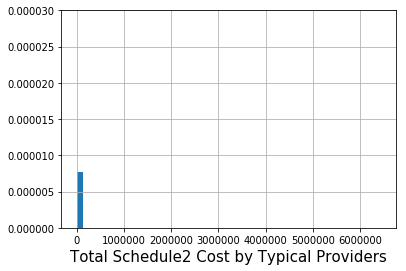

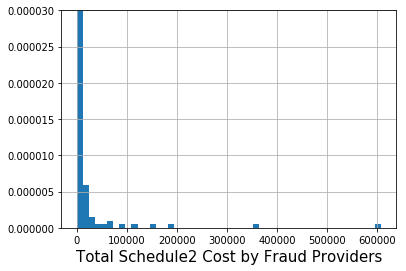

In [39]:
# sales behavior difference between typical and fraud providers
schedule2_by_fraud = part_d_df[(part_d_df['is_excluded'] == 1) & (part_d_df['is_schedule2'] == 1)]
schedule2_by_typical = part_d_df[(part_d_df['is_excluded'] == 0) & (part_d_df['is_schedule2'] == 1)]
all_by_fraud = part_d_df[(part_d_df['is_excluded'] == 1)]
all_by_typical = part_d_df[(part_d_df['is_excluded'] == 0)]

schedule2_by_typical.total_drug_cost.hist(bins=50, normed=True)
plt.xlabel('Total Schedule2 Cost by Typical Providers', fontsize=15)
plt.savefig('schedule2_by_typical_2013.jpeg', dpi=1000)
plt.ylim([0, 0.00003])
plt.show()
schedule2_by_fraud.total_drug_cost.hist(bins=50, normed=True)
plt.xlabel('Total Schedule2 Cost by Fraud Providers', fontsize=15)
plt.savefig('schedule2_by_fraud_2013.jpeg', dpi=1000)
plt.ylim([0, 0.00003])
plt.show()

In [12]:
# Market Basket Analysis
#part_d_df_2013_e = part_d_df[part_d_df['is_excluded'] == 1]
#part_d_df_2013_ne = part_d_df[part_d_df['is_excluded'] == 0]
#part_d_df_2013_s = part_d_df[part_d_df['is_schedule2'] == 1]
#part_d_df_2013_e[['npi','drug_name']].to_csv('2013_part_d_e.csv')
#part_d_df_2013_ne[['npi','drug_name']].to_csv('2013_part_d_ne.csv')
#part_d_df_2013_s[['npi','drug_name']].to_csv('2013_part_d_s.csv')
#market_basket_2013  = pd.read_csv('data/market_basket_2013.csv', low_memory=False)
#len(part_d_df_exclusion['npi'].unique())
#len(part_d_df['npi'].unique())
#len(market_basket_2013)
#market_basket_2013.head()